# Text Mining Topic Analysis

## Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset_shrunk.csv")

In [3]:
assigned_df = pd.read_table("sentiment-topic-final-test.tsv")

In [4]:
df.head()

,sentence id,text,sentiment,topic
0,22,Emma Darcy has always been a good writer I lov...,positive,book
1,32,WOW! This is a major league book of hotness! ...,positive,book
2,39,Love this case! It protects the Kindle and op...,positive,book
3,48,Loved all the characters in each book cant wai...,positive,book
4,62,Drew finds out from his girlfriend's reading m...,positive,book


In [5]:
for example_sentence in df.text[:1]:
    print(example_sentence)

Emma Darcy has always been a good writer I love reading her books. they are the best pick me up when I am in a funk so as always great read.


In [6]:
df.topic.value_counts()

book          1500
restaurant    1500
movie         1500
Name: topic, dtype: int64

In [7]:
# !conda install -c conda-forge wordcloud

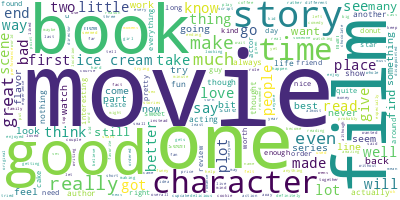

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preprocess the Data

We first make everything lowercase. Then we will make new columns which contain only clean words with different representations. This is for training multiple models with ease.

In [9]:
df['processed'] = df['text'].map(lambda x: x.lower())

In [10]:
df.head()

,sentence id,text,sentiment,topic,processed
0,22,Emma Darcy has always been a good writer I lov...,positive,book,emma darcy has always been a good writer i lov...
1,32,WOW! This is a major league book of hotness! ...,positive,book,wow! this is a major league book of hotness! ...
2,39,Love this case! It protects the Kindle and op...,positive,book,love this case! it protects the kindle and op...
3,48,Loved all the characters in each book cant wai...,positive,book,loved all the characters in each book cant wai...
4,62,Drew finds out from his girlfriend's reading m...,positive,book,drew finds out from his girlfriend's reading m...


We use gensims stopwords.

In [11]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS

import nltk
from nltk.corpus import stopwords

In [12]:
len(gensim.parsing.preprocessing.STOPWORDS)

337

In [13]:
#stopwords.words('english')

In [14]:
print(gensim.parsing.preprocessing.STOPWORDS)

frozenset({'via', 'elsewhere', 'nevertheless', 'fifty', 'each', 'why', 'thereafter', 'made', 'here', 'used', 'thru', 'amoungst', 'together', 'meanwhile', 'last', 'itself', 'they', 'off', 'cannot', 'eleven', 'kg', 'none', 'where', 'him', 'first', 'namely', 'became', 'whole', 'within', 'fill', 'three', 'across', 'nobody', 'thin', 'ever', 'more', 'without', 'indeed', 'full', 'seemed', 'therefore', 'either', 'although', 'one', 'both', 'moreover', 'third', 'detail', 'don', 'back', 'further', 'else', 'since', 'were', 'everything', 'any', 'nor', 'so', 'part', 'this', 'than', 'etc', 'against', 'whither', 'though', 'under', 'which', 'does', 'while', 'them', 'but', 'be', 'sometimes', 'thereupon', 'might', 'somewhere', 'whereafter', 'due', 'neither', 'latterly', 'same', 'done', 'up', 'afterwards', 'must', 'bill', 'describe', 'every', 'ie', 'who', 'can', 'noone', 'themselves', 'amount', 'will', 'show', 'whoever', 'call', 'an', 'doing', 'he', 'system', 'several', 'should', 'hereby', 'perhaps', 'to'

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
from nltk.stem import SnowballStemmer

In [18]:
stemmer = SnowballStemmer("english")

In [19]:
def lemmatize(text):
    return lemmatizer.lemmatize(text)

In [20]:
def stemmize(text):
    return stemmer.stem(text)

In [21]:
def remove_stopwords_into_array(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [22]:
def lemmatize_array(text):
    result = []
    for token in text:
        result.append(lemmatize(token))
    
    return result

In [23]:
def stemmize_array(text):
    result = []
    for token in text:
        result.append(stemmize(token))
    
    return result

In [24]:
def stringize_array(array):
    return ' '.join(array)

In [25]:
df['processed'] = df['processed'].map(remove_stopwords_into_array)

In [26]:
df['lemmatized'] = df['processed'].map(lemmatize_array)

In [27]:
df['stemmized'] = df['processed'].map(stemmize_array)

In [28]:
df['processed'] = df['lemmatized'].map(stringize_array)

In [29]:
df['stem_str'] = df['stemmized'].map(stringize_array)

In [30]:
df.head()

,sentence id,text,sentiment,topic,processed,lemmatized,stemmized,stem_str
0,22,Emma Darcy has always been a good writer I lov...,positive,book,emma darcy good writer love reading book best ...,"[emma, darcy, good, writer, love, reading, boo...","[emma, darci, good, writer, love, read, book, ...",emma darci good writer love read book best pic...
1,32,WOW! This is a major league book of hotness! ...,positive,book,major league book hotness love reading bisexua...,"[major, league, book, hotness, love, reading, ...","[major, leagu, book, hot, love, read, bisexu, ...",major leagu book hot love read bisexu menag pl...
2,39,Love this case! It protects the Kindle and op...,positive,book,love case protects kindle open side likely dro...,"[love, case, protects, kindle, open, side, lik...","[love, case, protect, kindl, open, side, like,...",love case protect kindl open side like drop op...
3,48,Loved all the characters in each book cant wai...,positive,book,loved character book wait book series truly st...,"[loved, character, book, wait, book, series, t...","[love, charact, book, wait, book, seri, truli,...",love charact book wait book seri truli steami ...
4,62,Drew finds out from his girlfriend's reading m...,positive,book,drew find girlfriend reading material eacute n...,"[drew, find, girlfriend, reading, material, ea...","[drew, find, girlfriend, read, materi, eacut, ...",drew find girlfriend read materi eacut nage fa...


We now have clean enough data to feed into a model. We can also drop columns if we run into memory problems. Now we will split the dataset into train and test(10%). 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:

#For gensim LDA, Array
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(df.lemmatized, df.topic, test_size = 0.1)

#For SKLEARN LDA, Strings
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(df.processed, df.topic, test_size = 0.1)

#For SKLEARN TF-IDF, Strings
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(df.stem_str, df.topic, test_size = 0.1)

Now, we can train models by supplying X_train_. as data and y_train_. as labels.

We also want to process our assigned dataset the same way so that we can test on it.

In [33]:
assigned_df['processed'] = assigned_df['text'].map(lambda x: x.lower())

In [34]:
assigned_df['processed'] = assigned_df['processed'].map(remove_stopwords_into_array)

In [35]:
assigned_df['lemmatized'] = assigned_df['processed'].map(lemmatize_array)

In [36]:
assigned_df['stemmized'] = assigned_df['processed'].map(stemmize_array)

In [37]:
assigned_df['processed'] = assigned_df['lemmatized'].map(stringize_array)

In [38]:
assigned_df['stem_str'] = assigned_df['stemmized'].map(stringize_array)

In [39]:
assigned_df

,sentence id,text,sentiment,topic,processed,lemmatized,stemmized,stem_str
0,0,It took eight years for Warner Brothers to rec...,negative,movie,took year warner brother recover disaster movie,"[took, year, warner, brother, recover, disaste...","[took, year, warner, brother, recov, disast, m...",took year warner brother recov disast movi
1,1,All the New York University students love this...,positive,restaurant,york university student love diner soho make y...,"[york, university, student, love, diner, soho,...","[york, univers, student, love, diner, soho, ma...",york univers student love diner soho make youn...
2,2,This Italian place is really trendy but they h...,negative,restaurant,italian place trendy forgotten important resta...,"[italian, place, trendy, forgotten, important,...","[italian, place, trendi, forgotten, import, re...",italian place trendi forgotten import restaur ...
3,3,"In conclusion, my review of this book would be...",positive,book,conclusion review book like jane austen unders...,"[conclusion, review, book, like, jane, austen,...","[conclus, review, book, like, jane, austen, un...",conclus review book like jane austen understan...
4,4,The story of this movie is focused on Carl Bra...,neutral,movie,story movie focused carl brashear played cuba ...,"[story, movie, focused, carl, brashear, played...","[stori, movi, focus, carl, brashear, play, cub...",stori movi focus carl brashear play cuba good ...
5,5,Chris O'Donnell stated that while filming for ...,neutral,movie,chris donnell stated filming movie felt like c...,"[chris, donnell, stated, filming, movie, felt,...","[chris, donnel, state, film, movi, felt, like,...",chris donnel state film movi felt like commerci
6,6,My husband and I moved to Amsterdam 6 years ag...,positive,restaurant,husband moved amsterdam year long lived blauwb...,"[husband, moved, amsterdam, year, long, lived,...","[husband, move, amsterdam, year, long, live, b...",husband move amsterdam year long live blauwbru...
7,7,Dame Maggie Smith performed her role excellent...,positive,movie,dame maggie smith performed role excellently m...,"[dame, maggie, smith, performed, role, excelle...","[dame, maggi, smith, perform, role, excel, movi]",dame maggi smith perform role excel movi
8,8,The new movie by Mr. Kruno was shot in New Yor...,neutral,movie,movie kruno shot york story take place angeles,"[movie, kruno, shot, york, story, take, place,...","[movi, kruno, shot, york, stori, take, place, ...",movi kruno shot york stori take place angel
9,9,"I always have loved English novels, but I just...",negative,book,loved english novel couldn,"[loved, english, novel, couldn]","[love, english, novel, couldn]",love english novel couldn


## Training Models

# LDA with SKLEARN 

We will first train LDA with SKLEARN, then GENSIM.

In [40]:
df.topic.value_counts()

book          1500
restaurant    1500
movie         1500
Name: topic, dtype: int64

We load Count and Tfidf Vectorizers

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#For visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x = x_pos, y= counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [43]:
count_vectorizer = CountVectorizer(min_df=1, # in how many documents the term minimally occurs
                            max_df=0.5,
                            tokenizer=nltk.word_tokenize)
                            

tfidf_vectorizer = TfidfVectorizer(min_df=1, # in how many documents the term minimally occurs
                            max_df=0.5,
                            tokenizer=nltk.word_tokenize)
                            



We noticed that SKLEARN LDA performs better when using the lemmatized words. Thus we are using the lemmatized X_train_str.

In [44]:
X_train_cv = count_vectorizer.fit_transform(X_train_str)

In [45]:
words = count_vectorizer.get_feature_names()

/home/ai/anaconda3/envs/textmin/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
count_vectorizer.get_feature_names_out()[1000:1050]

array(['ashutosh', 'ashwini', 'ashworth', 'asia', 'asiago', 'asian',
       'aside', 'asimov', 'asinine', 'asked', 'askew', 'asking', 'asks',
       'askwith', 'asleep', 'aslo', 'asparagus', 'aspect', 'asperger',
       'aspiration', 'aspire', 'aspiring', 'ass', 'assailant', 'assassin',
       'assassinate', 'assassination', 'assault', 'assemble', 'assembled',
       'assembles', 'assembling', 'assembly', 'assert', 'asserting',
       'assertion', 'assertive', 'assessing', 'asset', 'asshat', 'assign',
       'assigned', 'assigning', 'assignment', 'assimilating', 'assist',
       'assistance', 'assistant', 'assisted', 'assisting'], dtype=object)

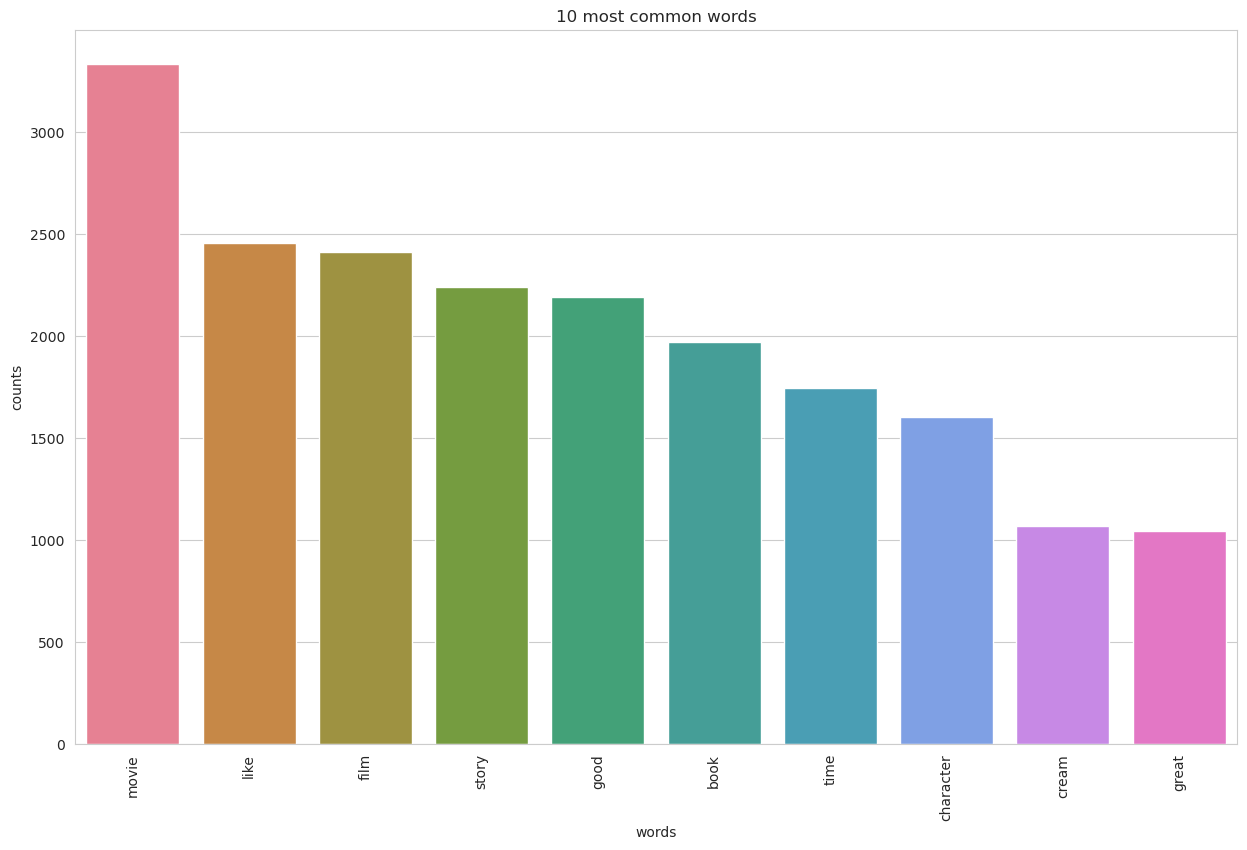

In [47]:
# Visualise the 10 most common words
plot_10_most_common_words(X_train_cv, count_vectorizer)

The top 10 words in the count vectorizer shows that we have useless words present like "love" or "good" or "like". They add no value to topic analysis yet they are very frequent, the models would perform better if we removed such words.

We will first try LDA to see how it performs, but we have labeled data so will prefer supervised learning.

In [48]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 3
number_words = 10

# Create the LDA model
lda_model = LDA(n_components=number_topics, verbose=1)

In [49]:
lda_model.fit(X_train_cv)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(n_components=3, verbose=1)

In [50]:
print("Topics found via LDA:")
print_topics(lda_model, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
cream good place like cake flavor time chocolate donut sweet

Topic #1:
movie film like good character time story scene watch acting

Topic #2:
book story read character like time love good author series


/home/ai/anaconda3/envs/textmin/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We believe these topics fit well to our labels. So we can test it.

Topic 0 corresponds to restaurant

Topic 1 corresponds to movie

Topic 2 corresponds to book

#### Now we can test our LDA model.

In [51]:
df.topic.value_counts()

book          1500
restaurant    1500
movie         1500
Name: topic, dtype: int64

In [52]:
def get_topic_from_array(array):
    i = 0
    for x in array:
        if x == max(array):
            break
        i = i+1
    
    if i == 0:
        return "restaurant"
    if i == 1:
        return "movie"
    if i == 2:
        return "book"
    else:
        print("error")

In [53]:
X_test_cv = count_vectorizer.transform(X_test_str)

In [54]:
array = lda_model.transform(X_test_cv)

In [55]:
y_pred = [get_topic_from_array(x) for x in array] 

In [56]:
from sklearn.metrics import classification_report

In [57]:
report_lda_sk = classification_report(y_test_str, y_pred)

In [58]:
print(report_lda_sk)

              precision    recall  f1-score   support

        book       0.98      0.94      0.96       156
       movie       0.95      0.98      0.96       162
  restaurant       0.99      1.00      1.00       132

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



We see that LDA performs pretty well on the test dataset. We will now try the assigned dataset.

In [59]:
assigned_df

,sentence id,text,sentiment,topic,processed,lemmatized,stemmized,stem_str
0,0,It took eight years for Warner Brothers to rec...,negative,movie,took year warner brother recover disaster movie,"[took, year, warner, brother, recover, disaste...","[took, year, warner, brother, recov, disast, m...",took year warner brother recov disast movi
1,1,All the New York University students love this...,positive,restaurant,york university student love diner soho make y...,"[york, university, student, love, diner, soho,...","[york, univers, student, love, diner, soho, ma...",york univers student love diner soho make youn...
2,2,This Italian place is really trendy but they h...,negative,restaurant,italian place trendy forgotten important resta...,"[italian, place, trendy, forgotten, important,...","[italian, place, trendi, forgotten, import, re...",italian place trendi forgotten import restaur ...
3,3,"In conclusion, my review of this book would be...",positive,book,conclusion review book like jane austen unders...,"[conclusion, review, book, like, jane, austen,...","[conclus, review, book, like, jane, austen, un...",conclus review book like jane austen understan...
4,4,The story of this movie is focused on Carl Bra...,neutral,movie,story movie focused carl brashear played cuba ...,"[story, movie, focused, carl, brashear, played...","[stori, movi, focus, carl, brashear, play, cub...",stori movi focus carl brashear play cuba good ...
5,5,Chris O'Donnell stated that while filming for ...,neutral,movie,chris donnell stated filming movie felt like c...,"[chris, donnell, stated, filming, movie, felt,...","[chris, donnel, state, film, movi, felt, like,...",chris donnel state film movi felt like commerci
6,6,My husband and I moved to Amsterdam 6 years ag...,positive,restaurant,husband moved amsterdam year long lived blauwb...,"[husband, moved, amsterdam, year, long, lived,...","[husband, move, amsterdam, year, long, live, b...",husband move amsterdam year long live blauwbru...
7,7,Dame Maggie Smith performed her role excellent...,positive,movie,dame maggie smith performed role excellently m...,"[dame, maggie, smith, performed, role, excelle...","[dame, maggi, smith, perform, role, excel, movi]",dame maggi smith perform role excel movi
8,8,The new movie by Mr. Kruno was shot in New Yor...,neutral,movie,movie kruno shot york story take place angeles,"[movie, kruno, shot, york, story, take, place,...","[movi, kruno, shot, york, stori, take, place, ...",movi kruno shot york stori take place angel
9,9,"I always have loved English novels, but I just...",negative,book,loved english novel couldn,"[loved, english, novel, couldn]","[love, english, novel, couldn]",love english novel couldn


In [60]:
assigned_pred = lda_model.transform(count_vectorizer.transform(assigned_df.processed))

In [61]:
y_assigned_pred = [get_topic_from_array(x) for x in assigned_pred] 

In [62]:
report_lda_ass = classification_report(y_assigned_pred, assigned_df.topic)

In [63]:
print(report_lda_ass)

              precision    recall  f1-score   support

        book       1.00      1.00      1.00         2
       movie       1.00      0.83      0.91         6
  restaurant       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.94      0.90        10
weighted avg       0.93      0.90      0.91        10



In [64]:
print("pred \t", "label") 
for i in range(len(y_assigned_pred)):
    
    print(y_assigned_pred[i], "\t\t", assigned_df.topic[i])

pred 	 label
movie 		 movie
movie 		 restaurant
restaurant 		 restaurant
book 		 book
movie 		 movie
movie 		 movie
restaurant 		 restaurant
movie 		 movie
movie 		 movie
book 		 book


So this model misidentifies just one restaurant as a movie.

In [65]:
print(assigned_df.text[1])

All the New York University students love this diner in Soho so it makes for a fun young atmosphere.


In [72]:
lemmatize("diner")

'diner'

In [85]:
test = lda_model.transform(count_vectorizer.transform(["diner"]))

In [86]:
get_topic_from_array(test[0])

'movie'

We can see that diner is not related to restaurant according to the model. This is because of the dataset as it doesn't contain enough references to diner.

# GENSIM

We want to train an LDA with GENSIM then compare it with the SKLEARN's LDA.

In [87]:
dictionary = gensim.corpora.Dictionary(X_train_lem)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 basic
1 book
2 breakfast
3 bring
4 bulky
5 cook
6 cream
7 doubly
8 example
9 explicit
10 great


In [88]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

In [89]:
bow_corpus = [dictionary.doc2bow(doc) for doc in X_train_lem]

In [90]:
#example sentence
bow_doc_43 = bow_corpus[43]
for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
                                               dictionary[bow_doc_43[i][0]], 
bow_doc_43[i][1]))

Word 20 ("standard") appears 1 time.
Word 41 ("like") appears 1 time.
Word 56 ("week") appears 1 time.
Word 175 ("time") appears 1 time.
Word 201 ("different") appears 1 time.
Word 258 ("wrote") appears 1 time.
Word 263 ("character") appears 1 time.
Word 290 ("writing") appears 1 time.
Word 311 ("look") appears 1 time.
Word 315 ("people") appears 1 time.
Word 398 ("getting") appears 1 time.
Word 448 ("episode") appears 1 time.
Word 466 ("series") appears 1 time.
Word 469 ("started") appears 1 time.
Word 489 ("boring") appears 1 time.
Word 507 ("save") appears 1 time.
Word 538 ("actor") appears 1 time.
Word 548 ("terrible") appears 2 time.
Word 596 ("worse") appears 1 time.
Word 870 ("disaster") appears 1 time.
Word 871 ("terrific") appears 1 time.


In [91]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

Train Gensim LDA

In [92]:
lda_model_gensim = gensim.models.LdaMulticore(tfidf_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [93]:
for idx, topic in lda_model_gensim.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"movie" + 0.006*"book" + 0.005*"cream" + 0.005*"story" + 0.004*"read" + 0.004*"good" + 0.004*"line" + 0.004*"time" + 0.004*"like" + 0.003*"place"
Topic: 1 
Words: 0.008*"book" + 0.008*"movie" + 0.008*"film" + 0.005*"story" + 0.005*"read" + 0.004*"like" + 0.004*"character" + 0.004*"good" + 0.003*"time" + 0.003*"great"
Topic: 2 
Words: 0.006*"cream" + 0.006*"book" + 0.005*"movie" + 0.005*"donut" + 0.005*"good" + 0.005*"story" + 0.004*"cake" + 0.004*"cupcake" + 0.004*"flavor" + 0.004*"love"


We can see that topics do not correspond to our labels and have lots of overlap. Thus we can say that sklearn performs better with our training data. We won't test this.

# TFIDF

Now we want to try TF-IDF. As we have labeled data, it may perform better than LDA. We choose Naive Bayes and LinearSVC as our algorithms.

In [94]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

We have tfidf_vectorizer defined above in SKLEARN.

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
clfidf = Pipeline( [
    ('vectorizer', tfidf_vectorizer),
    ('nb', model)
])

Stemmized version performs better with TFIDF. So we are using X_train_stem.

In [97]:
clfidf.fit(X_train_stem, y_train_stem)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5,
                                 tokenizer=<function word_tokenize at 0x7f1ca0a1dd40>)),
                ('nb', MultinomialNB())])

In [98]:
X_test_stem

326     kept read faster faster kept edg seat come sho...
1800    wasn abl justifi get baguett bread look delici...
946     need good proof reader error area write langua...
1898    awesom place music play staff friend donut soo...
774     suggest author suggest class children book per...
                              ...                        
2878    crack good rich plan share slice compost cooki...
2725    person cupcak craze thought cupcak special wai...
2949    okay special tart donut good overal think plac...
4363    movi good look direct best movi director time ...
3504    movi bore talk action set gloomi gray gray sho...
Name: stem_str, Length: 450, dtype: object

In [99]:
y_pred = clfidf.predict(X_test_stem)

In [100]:
report_tfidf_nb = classification_report(y_test_stem, y_pred)

In [101]:
print(report_tfidf_nb)

              precision    recall  f1-score   support

        book       0.99      0.96      0.98       146
       movie       0.96      0.99      0.98       165
  restaurant       1.00      1.00      1.00       139

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [102]:
print(report_lda_sk)

              precision    recall  f1-score   support

        book       0.98      0.94      0.96       156
       movie       0.95      0.98      0.96       162
  restaurant       0.99      1.00      1.00       132

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



So we can see that TF-IDF performed better than LDA, looking at the f1-scores. We believe this is due to supervised learning. 

Now let's try the same with SVM.

In [103]:
from sklearn.svm import LinearSVC

In [104]:
clfidf_svc = Pipeline( [
    ('vectorizer', tfidf_vectorizer),
    ('SVM', LinearSVC())
])

In [105]:
clfidf_svc.fit(X_train_stem, y_train_stem)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5,
                                 tokenizer=<function word_tokenize at 0x7f1ca0a1dd40>)),
                ('SVM', LinearSVC())])

In [106]:
svc_pred = clfidf_svc.predict(X_test_stem)

In [107]:
report_svm = classification_report(y_test_stem, y_pred)

In [108]:
print(report_svm)

              precision    recall  f1-score   support

        book       0.99      0.96      0.98       146
       movie       0.96      0.99      0.98       165
  restaurant       1.00      1.00      1.00       139

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [109]:
print(report_tfidf_nb)

              precision    recall  f1-score   support

        book       0.99      0.96      0.98       146
       movie       0.96      0.99      0.98       165
  restaurant       1.00      1.00      1.00       139

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



We see that the results look identical. Our dataset is relatively small and balanced, so there is not much of a difference between the two algorithms.

Now let's test on the assigned dataset.

In [110]:
assigned_df

,sentence id,text,sentiment,topic,processed,lemmatized,stemmized,stem_str
0,0,It took eight years for Warner Brothers to rec...,negative,movie,took year warner brother recover disaster movie,"[took, year, warner, brother, recover, disaste...","[took, year, warner, brother, recov, disast, m...",took year warner brother recov disast movi
1,1,All the New York University students love this...,positive,restaurant,york university student love diner soho make y...,"[york, university, student, love, diner, soho,...","[york, univers, student, love, diner, soho, ma...",york univers student love diner soho make youn...
2,2,This Italian place is really trendy but they h...,negative,restaurant,italian place trendy forgotten important resta...,"[italian, place, trendy, forgotten, important,...","[italian, place, trendi, forgotten, import, re...",italian place trendi forgotten import restaur ...
3,3,"In conclusion, my review of this book would be...",positive,book,conclusion review book like jane austen unders...,"[conclusion, review, book, like, jane, austen,...","[conclus, review, book, like, jane, austen, un...",conclus review book like jane austen understan...
4,4,The story of this movie is focused on Carl Bra...,neutral,movie,story movie focused carl brashear played cuba ...,"[story, movie, focused, carl, brashear, played...","[stori, movi, focus, carl, brashear, play, cub...",stori movi focus carl brashear play cuba good ...
5,5,Chris O'Donnell stated that while filming for ...,neutral,movie,chris donnell stated filming movie felt like c...,"[chris, donnell, stated, filming, movie, felt,...","[chris, donnel, state, film, movi, felt, like,...",chris donnel state film movi felt like commerci
6,6,My husband and I moved to Amsterdam 6 years ag...,positive,restaurant,husband moved amsterdam year long lived blauwb...,"[husband, moved, amsterdam, year, long, lived,...","[husband, move, amsterdam, year, long, live, b...",husband move amsterdam year long live blauwbru...
7,7,Dame Maggie Smith performed her role excellent...,positive,movie,dame maggie smith performed role excellently m...,"[dame, maggie, smith, performed, role, excelle...","[dame, maggi, smith, perform, role, excel, movi]",dame maggi smith perform role excel movi
8,8,The new movie by Mr. Kruno was shot in New Yor...,neutral,movie,movie kruno shot york story take place angeles,"[movie, kruno, shot, york, story, take, place,...","[movi, kruno, shot, york, stori, take, place, ...",movi kruno shot york stori take place angel
9,9,"I always have loved English novels, but I just...",negative,book,loved english novel couldn,"[loved, english, novel, couldn]","[love, english, novel, couldn]",love english novel couldn


In [114]:
nb_pred = clfidf.predict(assigned_df.stem_str)

In [112]:
svc_pred = clfidf_svc.predict(assigned_df.processed)

In [113]:
report_nb = classification_report(nb_pred, assigned_df.topic)
report_svc = classification_report(svc_pred, assigned_df.topic)

In [117]:
print(report_nb)

              precision    recall  f1-score   support

        book       1.00      1.00      1.00         2
       movie       1.00      0.83      0.91         6
  restaurant       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.94      0.90        10
weighted avg       0.93      0.90      0.91        10



In [118]:
print(report_svc)

              precision    recall  f1-score   support

        book       1.00      1.00      1.00         2
       movie       1.00      0.83      0.91         6
  restaurant       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.94      0.90        10
weighted avg       0.93      0.90      0.91        10



In [119]:
print(report_lda_ass)

              precision    recall  f1-score   support

        book       1.00      1.00      1.00         2
       movie       1.00      0.83      0.91         6
  restaurant       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.94      0.90        10
weighted avg       0.93      0.90      0.91        10



We have all algorithms perform the same on the assigned dataset. Actually they all fail at the same example.

In [120]:
print("pred \t", "label") 
for i in range(len(nb_pred)):
    
    print(nb_pred[i], "\t\t", assigned_df.topic[i])

pred 	 label
movie 		 movie
movie 		 restaurant
restaurant 		 restaurant
book 		 book
movie 		 movie
movie 		 movie
restaurant 		 restaurant
movie 		 movie
movie 		 movie
book 		 book


In [121]:
print(assigned_df.text[1])

All the New York University students love this diner in Soho so it makes for a fun young atmosphere.


This is because of our training dataset. If it had more data containing the word "diner", then our models would identify it as a restaurant-specific word. 